In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import itertools

## Read the dataset

In [ ]:
df_breastcancer = pd.read_csv('data/breastcancer.csv')
df_breastcancer.head()

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df_breastcancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   id                       569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

What do we observe:
- Total data: 569
- Columns has all values
- Only diagnosis (target value) is of type object (string), and rest are of type float64

Let's replace values of diagnosis to integer

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_breastcancer['diagnosis'] = lb.fit_transform(df_breastcancer['diagnosis'])
df_breastcancer.head(5)

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# create feature and response variables
# drop the response var and id column as it'll not make any sense to the analysis

X = df_breastcancer.iloc[:, 2:31]

# Target
y = df_breastcancer.iloc[:, 0]

# X = Features, y = label, target, response

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=Y)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 29)
(114, 29)
(455,)
(114,)


In [ ]:
GBM_Model = GradientBoostingClassifier()
GBM_Model.fit(X_train, y_train)

GradientBoostingClassifier()

In binary or multi-class classification, it is also quite popular to take a look at  
confusion matrix. Don’t be confused; it’s quite easy.  

A confusion matrix is nothing 
but a table of TP, FP, TN and FN. Using the confusion matrix, you can quickly see  
how many samples were misclassified and how many were classified correctly.

We see that the confusion matrix is made up of TP, FP, FN and TN. These are the  
only values we need to calculate precision, recall, F1 score and AUC. Sometimes,  
people also prefer calling FP as Type-I error and FN as Type-II error

In [ ]:
!pip install seaborn

     |████████████████████████████████| 215 kB 3.3 MB/s eta 0:00:01
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import seaborn as sns

def plot_confusion_matrix_simple(cm):
    # plot using matplotlib and seaborn
    plt.figure(figsize=(10, 10))
    cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
    sns.set(font_scale=2.5)
    sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97        72
           1       0.93      0.95      0.94        42

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion matrix:  <function confusion_matrix at 0x7ff02beba048>


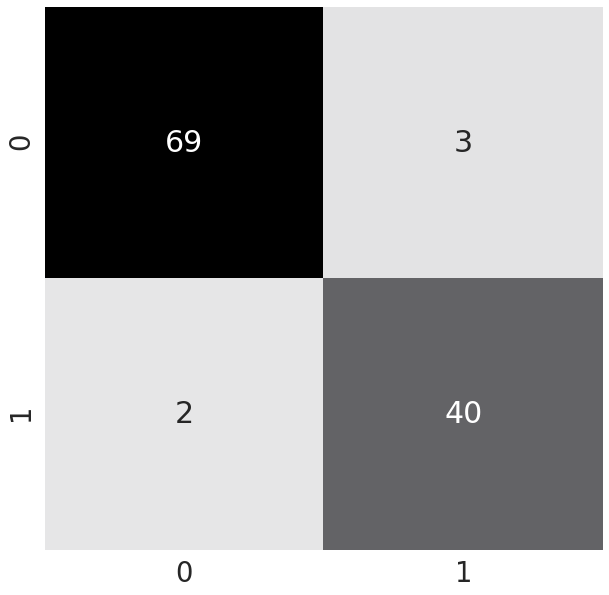

In [ ]:
y_pred_gbm = GBM_Model.predict(X_test)

print(classification_report(y_test, y_pred_gbm))

conf_matrix = confusion_matrix(y_test, y_pred_gbm)
print('Confusion matrix: ', confusion_matrix)
plot_confusion_matrix_simple(conf_matrix)

In [ ]:
print(f'Accuracy score = {accuracy_score(y_test, y_pred_gbm):.2f}')
print(f'Area under ROC curve = {roc_auc_score(y_test, y_pred_gbm):.2f}')

Accuracy score = 0.96
Area under ROC curve = 0.96


## Hyper-parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {
    "n_estimators":[100,150,200],
    "loss":["deviance"],
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    "min_samples_split":np.linspace(0.1, 0.5, 4),
    "min_samples_leaf": np.linspace(0.1, 0.5, 4),
    "max_depth":[3, 5, 8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.3, 0.6, 1.0]
}

In [ ]:
grid = GridSearchCV(GradientBoostingClassifier(), parameters, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mae'],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                           0.6, 0.7, 0.8, 0.9, 1],
                         'loss': ['deviance'], 'max_depth': [3, 5, 8],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': array([0.1       , 0.23333333, 0.36666667, 0.5       ]),
                         'min_samples_split': array([0.1       , 0.23333333, 0.36666667, 0.5       ]),
                         'n_estimators': [100, 150, 200],
                         'subsample': [0.3, 0.6, 1.0]})

In [ ]:
grid.best_estimator_

GradientBoostingClassifier(learning_rate=0.8, max_depth=8, max_features='sqrt',
                           min_samples_leaf=0.1, min_samples_split=0.5,
                           n_estimators=200, subsample=0.6)

In [ ]:
grid_predictions = grid.predict(X_test)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        72
           1       0.95      0.98      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



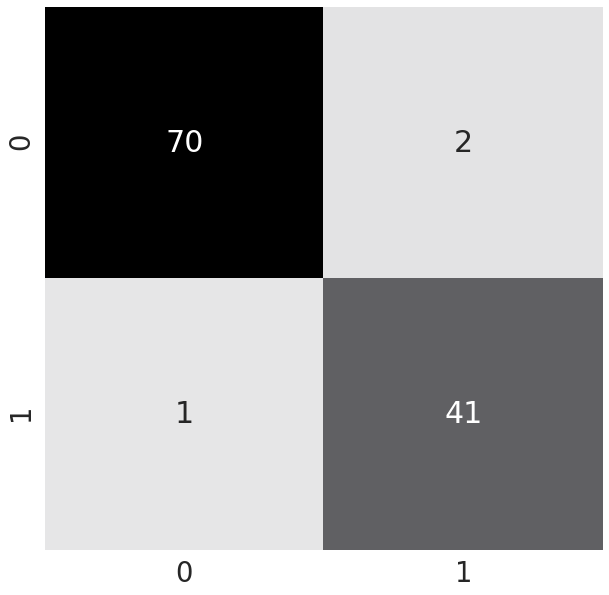

In [ ]:
print(classification_report(y_test, grid_predictions))

cnf_matrix = confusion_matrix(y_test, grid_predictions)
plot_confusion_matrix_simple(cnf_matrix)

In [ ]:
print(f'Accuracy score = {accuracy_score(y_test, grid_predictions):.2f}')
print(f'Area under ROC curve = {roc_auc_score(y_test, grid_predictions):.2f}')

Accuracy score = 0.97
Area under ROC curve = 0.97
